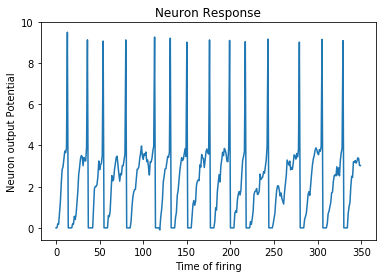

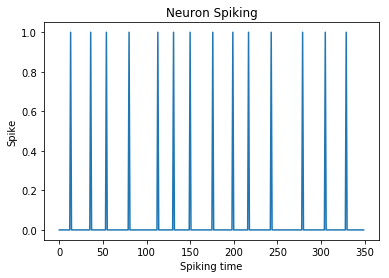

In [1]:
#author = Vinohith
#spiking neuron with pre-synaptic synapses


import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


# initializing some constants
refractory_time = 5   #neuron refractory time (minimum time between subsequent spikes)
v_threshold = 4       #threshold voltage
v_spike = 5           #spiking voltage
v_ref = 0             #refrence voltage
time = np.arange(0, 350) #simulation time
input_synapse = 5   #five input synapes to the post-synaptic neuron
output = 1   #one post-synaptic neuron


#defining the LIF (Leaky Integrate and Fire) Neuron model
class neuron_model:
    def __init__(self):
        self.membrane_resistance = 10000   #membrane resistance value
        self.membrane_capicatance = 0.001  #membrane capacitance value
        self.tau = self.membrane_resistance * self.membrane_capicatance  #membrane time constant
        self.v_ref = 0     #refrence voltage
        self.v_rest = -1   #resting voltage
        self.v_reset = -1  #reset voltage
        
        

#defining the out of the neuron model
def out(S, w, v_ref, v_rest, tau):
    
    t_rest = 0    #initializing the resting time
    v = np.zeros(len(time))
    spike = np.zeros(len(time))
    
    for i, t in enumerate(time):
        #if the neuron is in its refractory period
        if t < t_rest:    
            v[i] = v_ref
            spike[i] = 0
        #if the neuron is not in its refractory period
        elif t > t_rest:  
            x1 = S[:,i]   #synaptic inputs at that particular time instant
            v[i] = v[i-1] + ((1/tau) * (-(v[i-1] - v_rest) + np.dot(w, x1)))  #LIF equation of the neuron
            spike[i] = 0
        #generation of spike
        if v[i] >= v_threshold:   
            v[i] += v_spike
            t_rest = t + refractory_time  #due to the spike generated the neuron goes into its refractory period
            spike[i] = 1
            
    return v, spike


#instantiating the neuron model
model = neuron_model()



np.random.seed(1)
random.seed(1)
#strength of connections (i.e synaptic weights)
weights = np.random.randint(0, 5, (output, input_synapse))
#value of the signal at the synapses
synapse = []


#generating random synaptic values
for i in range(input_synapse):
    
    temp = []
    
    for i in range(len(time)):
        
        x = random.randrange(0, 2)
        temp.append(x)
    synapse.append(temp)
    
synapse = np.array(synapse)


#calling the neuron output function defined
output_v, output_spikes = out(synapse, weights, model.v_ref, model.v_rest, model.tau)


#ploting the Neuron response vs simulation time
plt.title('Neuron Response')
plt.xlabel('Time of firing')
plt.ylabel('Neuron output Potential')
plt.plot(time, output_v)
plt.show()


#ploting the Neuron spiking vs simulation time
plt.title('Neuron Spiking')
plt.xlabel('Spiking time')
plt.ylabel('Spike')
plt.plot(time, output_spikes)
plt.show()